<a href="https://colab.research.google.com/github/Dimple626/21Projects-ML-DL-GenAI-/blob/main/Project11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Using device: cuda


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

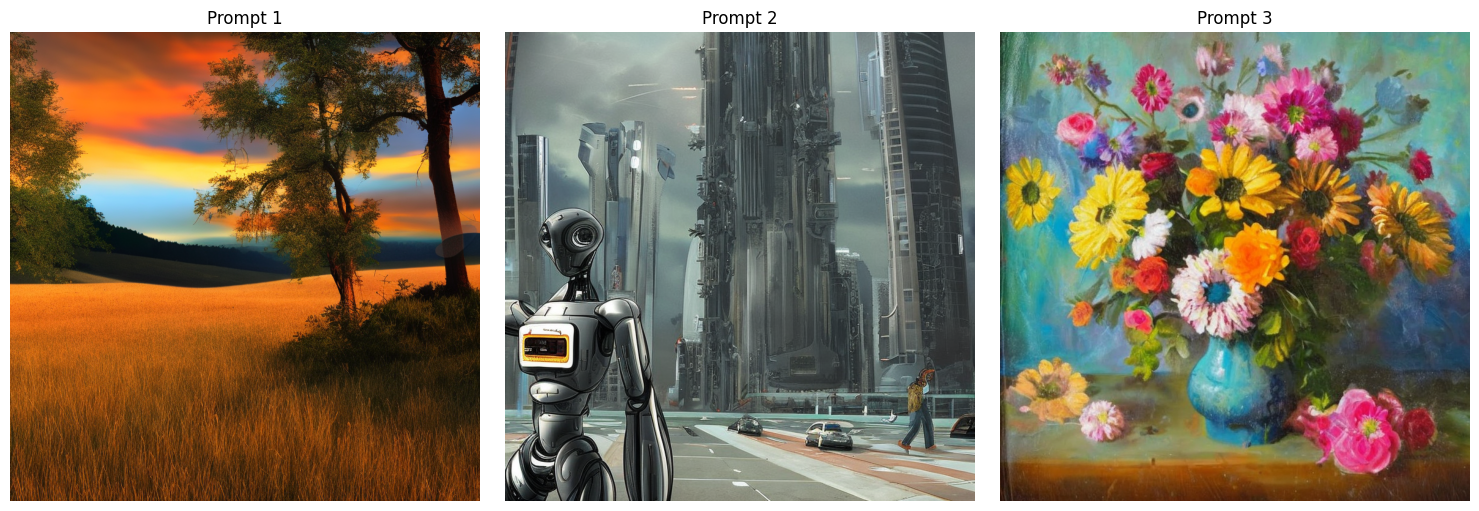

In [2]:
# Install necessary libraries (run this cell if libraries are not installed)
!pip install diffusers transformers accelerate --quiet

# Import libraries
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

# Check device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)
if device == "cuda":
    pipe = pipe.to("cuda")  # Only move to GPU if available

print(f"Using device: {device}")

# Prompts for generation
prompts = [
    "A beautiful landscape during sunset, high resolution",
    "A futuristic robot in a cityscape, concept art",
    "A colorful bouquet of flowers on a table, oil painting style"
]

# Generate and collect images
images = []
for prompt in prompts:
    result = pipe(prompt)
    img = result.images[0]
    images.append((prompt, img))

# Display images
plt.figure(figsize=(15, 5))
for i, (prompt, img) in enumerate(images):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prompt {i+1}")
plt.tight_layout()
plt.show()
